In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [121]:
df= pd.read_csv("E:\Data sets\Bengaluru_House_Data.csv")

In [122]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.00000,1.00000,39.07000
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.00000,3.00000,120.00000
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.00000,3.00000,62.00000
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.00000,1.00000,95.00000
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.00000,1.00000,51.00000


In [123]:
df.drop(['area_type','availability','society','balcony'],axis=1,inplace=True)

In [124]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.00000,39.07000
1,Chikka Tirupathi,4 Bedroom,2600,5.00000,120.00000
2,Uttarahalli,3 BHK,1440,2.00000,62.00000
3,Lingadheeranahalli,3 BHK,1521,3.00000,95.00000
4,Kothanur,2 BHK,1200,2.00000,51.00000


In [125]:
df.shape

(13320, 5)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [127]:
df.describe()

,bath,price
count,13247.00000,13320.00000
mean,2.69261,112.56563
std,1.34146,148.97167
min,1.00000,8.00000
25%,2.00000,50.00000
50%,2.00000,72.00000
75%,3.00000,120.00000
max,40.00000,3600.00000


In [128]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [129]:
df.dropna(inplace=True)

In [130]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [131]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.00000,39.07000
1,Chikka Tirupathi,4 Bedroom,2600,5.00000,120.00000
2,Uttarahalli,3 BHK,1440,2.00000,62.00000
3,Lingadheeranahalli,3 BHK,1521,3.00000,95.00000
4,Kothanur,2 BHK,1200,2.00000,51.00000


In [132]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [133]:
# here we do not want bhk and bedroom. directlyt no. should be shown
# first use split to split no. & object
# then use index [0] to just get the no.
#the finally convert it to intiger as the no. is in string
s= '2 BHK'
s1= '4 Bedroom'

In [134]:
l= s1.split()
l

['4', 'Bedroom']

In [135]:
l[0]

'4'

In [136]:
int(l[0])

4

In [137]:
int(s1.split(' ')[0])

4

In [138]:
# now build a logic to do this all steps in a single function

df['bhk']= df['size'].apply(lambda x: int(x.split(' ')[0]) )

In [139]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.00000,39.07000,2
1,Chikka Tirupathi,4 Bedroom,2600,5.00000,120.00000,4
2,Uttarahalli,3 BHK,1440,2.00000,62.00000,3
3,Lingadheeranahalli,3 BHK,1521,3.00000,95.00000,3
4,Kothanur,2 BHK,1200,2.00000,51.00000,2


In [140]:
df1 = df.drop(['size'],axis=1)

In [141]:
df1.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.00000,39.07000,2
1,Chikka Tirupathi,2600,5.00000,120.00000,4
2,Uttarahalli,1440,2.00000,62.00000,3
3,Lingadheeranahalli,1521,3.00000,95.00000,3
4,Kothanur,1200,2.00000,51.00000,2


In [142]:
# ' total sqft' column type is object so convert it to float
#if it can convert the no. to float then it converts  or returns value as false

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [143]:
is_float('1085')

True

In [144]:
is_float('1056-2001')

False

In [145]:
df1[df1['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.00000,39.07000,2
1,Chikka Tirupathi,2600,5.00000,120.00000,4
2,Uttarahalli,1440,2.00000,62.00000,3
3,Lingadheeranahalli,1521,3.00000,95.00000,3
4,Kothanur,1200,2.00000,51.00000,2
...,...,...,...,...,...
13315,Whitefield,3453,4.00000,231.00000,5
13316,Richards Town,3600,5.00000,400.00000,4
13317,Raja Rajeshwari Nagar,1141,2.00000,60.00000,2
13318,Padmanabhanagar,4689,4.00000,488.00000,4


In [146]:
df1[df1['total_sqft'].apply(is_float)].shape

(13056, 5)

In [147]:
# opposite output of the current result.(~) is used
# i.e the no. that are not converted to float

df1[~df1['total_sqft'].apply(is_float)]


,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.00000,186.00000,4
122,Hebbal,3067 - 8156,4.00000,477.00000,4
137,8th Phase JP Nagar,1042 - 1105,2.00000,54.00500,2
165,Sarjapur,1145 - 1340,2.00000,43.49000,2
188,KR Puram,1015 - 1540,2.00000,56.80000,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.00000,38.19000,2
12990,Talaghattapura,1804 - 2273,3.00000,122.00000,3
13059,Harlur,1200 - 1470,2.00000,72.76000,2
13265,Hoodi,1133 - 1384,2.00000,59.13500,2


In [148]:
df1[~df1['total_sqft'].apply(is_float)].shape

(190, 5)

In [149]:
# to convert 'total-sqft' into a single no.
# find the average of the object

# logic to do this is

s= '2100 - 2850'
l=s.split(' - ')
l

['2100', '2850']

In [150]:
(float(l[0])+float(l[1]))/2

2475.0

In [151]:
 def convert(x):
        l=x.split(' - ')
        if len(l)==2:
            return((float(l[0])+float(l[1]))/2)
        try:
            return float(x)
        except:
            return None

In [152]:
convert('2380 - 2882')

2631.0

In [153]:
df2 =df1.copy()

In [154]:
df2

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.00000,39.07000,2
1,Chikka Tirupathi,2600,5.00000,120.00000,4
2,Uttarahalli,1440,2.00000,62.00000,3
3,Lingadheeranahalli,1521,3.00000,95.00000,3
4,Kothanur,1200,2.00000,51.00000,2
...,...,...,...,...,...
13315,Whitefield,3453,4.00000,231.00000,5
13316,Richards Town,3600,5.00000,400.00000,4
13317,Raja Rajeshwari Nagar,1141,2.00000,60.00000,2
13318,Padmanabhanagar,4689,4.00000,488.00000,4


In [155]:
df2['total_sqft']= df2['total_sqft'].apply(convert)

In [156]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13200 non-null  float64
 2   bath        13246 non-null  float64
 3   price       13246 non-null  float64
 4   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 620.9+ KB


In [157]:
df2.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [158]:
#  find price  per sqft 

df2['price_per_sqft']= (df2['price']*100000/df2['total_sqft'])
df2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.00000,2.00000,39.07000,2,3699.81061
1,Chikka Tirupathi,2600.00000,5.00000,120.00000,4,4615.38462
2,Uttarahalli,1440.00000,2.00000,62.00000,3,4305.55556
3,Lingadheeranahalli,1521.00000,3.00000,95.00000,3,6245.89086
4,Kothanur,1200.00000,2.00000,51.00000,2,4250.00000


In [159]:
df2['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [160]:
len(df2['location'].unique())

1304

In [161]:
# using groupby to particular no. of flat in the location

location_stats= df2.groupby('location')['location'].value_counts()
location_stats

location              location            
 Anekal                Anekal                 1
 Banaswadi             Banaswadi              1
 Basavangudi           Basavangudi            1
 Bhoganhalli           Bhoganhalli            1
 Devarabeesana Halli   Devarabeesana Halli    6
                                             ..
t.c palya             t.c palya               1
tc.palya              tc.palya                4
vinayakanagar         vinayakanagar           1
white field,kadugodi  white field,kadugodi    1
whitefiled            whitefiled              1
Name: location, Length: 1304, dtype: int64

In [162]:
# sort value used to sort data in decending order

location_stats= df2.groupby('location')['location'].value_counts().sort_values(ascending=False)
location_stats

location             location           
Whitefield           Whitefield             534
Sarjapur  Road       Sarjapur  Road         392
Electronic City      Electronic City        302
Kanakpura Road       Kanakpura Road         266
Thanisandra          Thanisandra            233
                                           ... 
 Banaswadi            Banaswadi               1
Kanakadasa Layout    Kanakadasa Layout        1
Kanakapur main road  Kanakapur main road      1
Kanakapura  Rod      Kanakapura  Rod          1
whitefiled           whitefiled               1
Name: location, Length: 1304, dtype: int64

In [163]:
# find the value that are less than 10

less_than_10 = location_stats[location_stats< 10]
less_than_10

location               location             
Kamakshipalya          Kamakshipalya            9
Kaverappa Layout       Kaverappa Layout         9
Yemlur                 Yemlur                   9
Sector 1 HSR Layout    Sector 1 HSR Layout      9
4th Block Koramangala  4th Block Koramangala    9
                                               ..
 Banaswadi              Banaswadi               1
Kanakadasa Layout      Kanakadasa Layout        1
Kanakapur main road    Kanakapur main road      1
Kanakapura  Rod        Kanakapura  Rod          1
whitefiled             whitefiled               1
Name: location, Length: 1051, dtype: int64

In [164]:
len(less_than_10)

1051

In [165]:
# convert the location into string using str(x)
#then remove the space using x.strip()

df2['location']= df2['location'].apply(lambda x: str(x))
df2['location']= df['location'].apply(lambda x: x.strip())

In [166]:
#location with values less than 10 we can write it as other 

df2['location']= df2['location'].apply(lambda x: 'others' if x in less_than_10 else x)

In [167]:
location_stats= df2.groupby('location')['location'].value_counts().sort_values(ascending=False)
location_stats

location                  location                
others                    others                      2716
Whitefield                Whitefield                   535
Sarjapur  Road            Sarjapur  Road               392
Electronic City           Electronic City              304
Kanakpura Road            Kanakpura Road               266
                                                      ... 
JP nagar 9th Phase,       JP nagar 9th Phase,            1
Banaswadi,                Banaswadi,                     1
Panathur Road,            Panathur Road,                 1
Electronic City Phase 1,  Electronic City Phase 1,       1
Kanakapura Road,          Kanakapura Road,               1
Name: location, Length: 283, dtype: int64

In [168]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.00000,13246.00000,13246.00000,13246.00000,13200.00000
mean,1555.30278,2.69259,112.38939,2.80190,7920.75915
std,1237.32345,1.34151,149.07659,1.29576,106727.15521
min,1.00000,1.00000,8.00000,1.00000,267.82981
25%,1100.00000,2.00000,50.00000,2.00000,4267.70135
50%,1275.00000,2.00000,72.00000,3.00000,5438.33148
75%,1672.00000,3.00000,120.00000,3.00000,7317.07317
max,52272.00000,40.00000,3600.00000,43.00000,12000000.00000


In [169]:
# if we get value like (1.320000e+04) which we do not want 
# this pd.set_option is applied to all the cells in that notebook

pd.set_option('display.float_format',lambda x: '%.5f' % x)

# if we want it to deactivate

  #pd.reset_option('display.float_format')

In [170]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.00000,13246.00000,13246.00000,13246.00000,13200.00000
mean,1555.30278,2.69259,112.38939,2.80190,7920.75915
std,1237.32345,1.34151,149.07659,1.29576,106727.15521
min,1.00000,1.00000,8.00000,1.00000,267.82981
25%,1100.00000,2.00000,50.00000,2.00000,4267.70135
50%,1275.00000,2.00000,72.00000,3.00000,5438.33148
75%,1672.00000,3.00000,120.00000,3.00000,7317.07317
max,52272.00000,40.00000,3600.00000,43.00000,12000000.00000


In [171]:
df2.sample(50)

,location,total_sqft,bath,price,bhk,price_per_sqft
465,others,1150.00000,2.00000,126.00000,2,10956.52174
2175,others,975.00000,2.00000,43.00000,2,4410.25641
8904,Ambalipura,1625.00000,2.00000,145.00000,3,8923.07692
5825,Choodasandra,1465.00000,3.00000,75.00000,3,5119.45392
2000,Bellandur,2025.00000,4.00000,109.00000,4,5382.71605
9766,Koramangala,1744.00000,4.00000,210.00000,3,12041.28440
1290,Haralur Road,1194.00000,2.00000,47.00000,2,3936.34841
2378,others,1311.00000,2.00000,48.00000,2,3661.32723
1711,others,2200.00000,4.00000,235.00000,4,10681.81818
8595,Ramamurthy Nagar,1360.00000,2.00000,45.00000,2,3308.82353


In [172]:
# this values are wrong as total_sqft and bhk values does not match
# we do not have to work on this data as it is all wrong info


df2[df2.total_sqft/df2.bhk <300]

,location,total_sqft,bath,price,bhk,price_per_sqft
9,others,1020.00000,6.00000,370.00000,6,36274.50980
45,HSR Layout,600.00000,9.00000,200.00000,8,33333.33333
58,Murugeshpalya,1407.00000,4.00000,150.00000,6,10660.98081
68,others,1350.00000,7.00000,85.00000,8,6296.29630
70,others,500.00000,3.00000,100.00000,3,20000.00000
...,...,...,...,...,...,...
13277,others,1400.00000,7.00000,218.00000,7,15571.42857
13279,others,1200.00000,5.00000,130.00000,6,10833.33333
13281,Margondanahalli,1375.00000,5.00000,125.00000,5,9090.90909
13303,Vidyaranyapura,774.00000,5.00000,70.00000,5,9043.92765


In [173]:
# this values are the correct ones as it is opposite to the previous ones
# we just have to work on this data

df3= df2[~(df2.total_sqft/df2.bhk <300)]
df3

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.00000,2.00000,39.07000,2,3699.81061
1,Chikka Tirupathi,2600.00000,5.00000,120.00000,4,4615.38462
2,Uttarahalli,1440.00000,2.00000,62.00000,3,4305.55556
3,Lingadheeranahalli,1521.00000,3.00000,95.00000,3,6245.89086
4,Kothanur,1200.00000,2.00000,51.00000,2,4250.00000
...,...,...,...,...,...,...
13315,Whitefield,3453.00000,4.00000,231.00000,5,6689.83493
13316,others,3600.00000,5.00000,400.00000,4,11111.11111
13317,Raja Rajeshwari Nagar,1141.00000,2.00000,60.00000,2,5258.54514
13318,Padmanabhanagar,4689.00000,4.00000,488.00000,4,10407.33632


In [174]:
# 267 price_per_sqft is not possible

df3.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12456.00000,12502.00000,12502.00000,12502.00000,12456.00000
mean,1590.18993,2.56479,111.31192,2.65070,6308.50283
std,1260.40480,1.08495,152.08997,0.98170,4168.12734
min,300.00000,1.00000,9.00000,1.00000,267.82981
25%,1115.00000,2.00000,49.00000,2.00000,4210.52632
50%,1300.00000,2.00000,70.00000,3.00000,5294.11765
75%,1700.00000,3.00000,115.00000,3.00000,6916.66667
max,52272.00000,16.00000,3600.00000,16.00000,176470.58824


# this function is created to remove outliers 
def remove_pps_outliers(df):
    
# the result that we get should be stored in this dataframe 
    df_out =pd.DataFrame()
    
# keys will access location and sub df will access particular locations info.
    for keys,subdf in df.groupby('location'):
       print(keys)
    
# find mean of price per feet
    m= np.mean(subdf.price_per_feet)
    
# also find value of standard deviation
    s=np.std(subdf.price_per_feet)

# m-s and m+s both the condtion should be satisfied.
    reduced_df =subdf[(ubdf.price_per_feet> (m-s)) & (subdf.price_per_feet<(m+s))]
#   print(reduced_df)
        
# values from reduced_df is added to df_out
    df_out = pd.concat([df_out,reduced_df], ignore_ndex=True)
    print(df_out)
    return df_out
    



In [188]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for keys,subdf in df.groupby('location'):
#         print(keys)
        m=np.mean(subdf.price_per_sqft)
        s=np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft> (m-s)) & (subdf.price_per_sqft<(m+s))]
 #           print(reuced_df)
        df_out = pd.concat([df_out,reduced_df], ignore_index =True)
#         print(df_out)
    return df_out
    

In [243]:
df4.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10186.00000,10186.00000,10186.00000,10186.00000,10186.00000
mean,1504.38295,2.47585,91.38982,2.57343,5669.07007
std,878.70305,0.98922,88.18967,0.89944,2295.41303
min,300.00000,1.00000,10.00000,1.00000,1250.00000
25%,1108.00000,2.00000,49.00000,2.00000,4244.79671
50%,1281.00000,2.00000,67.00000,2.00000,5176.47059
75%,1650.00000,3.00000,100.00000,3.00000,6428.57143
max,30400.00000,16.00000,2200.00000,16.00000,24509.80392


In [190]:
df4= remove_pps_outliers(df3)
df4

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.00000,4.00000,428.00000,4,15017.54386
1,1st Block Jayanagar,1630.00000,3.00000,194.00000,3,11901.84049
2,1st Block Jayanagar,1875.00000,2.00000,235.00000,3,12533.33333
3,1st Block Jayanagar,1200.00000,2.00000,130.00000,3,10833.33333
4,1st Block Jayanagar,1235.00000,2.00000,148.00000,2,11983.80567
...,...,...,...,...,...,...
10181,others,1353.00000,2.00000,110.00000,2,8130.08130
10182,others,812.00000,1.00000,26.00000,1,3201.97044
10183,others,1440.00000,2.00000,63.93000,3,4439.58333
10184,others,1075.00000,2.00000,48.00000,2,4465.11628


In [191]:
df4.shape

(10186, 6)

In [193]:
import matplotlib

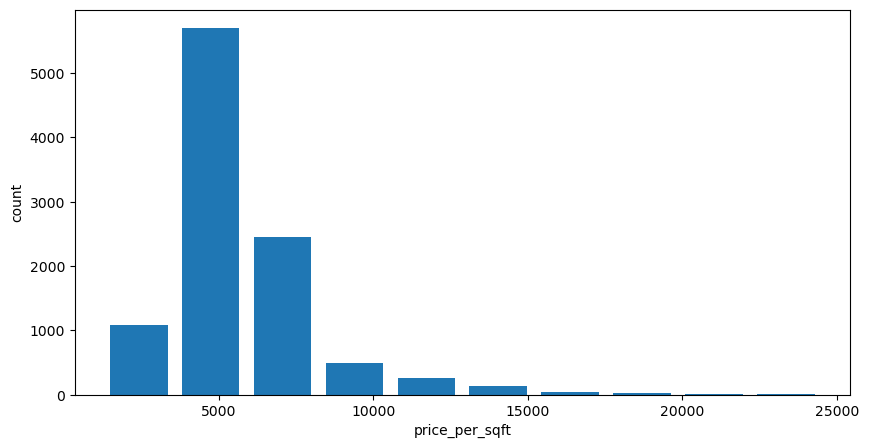

In [200]:
matplotlib.rcParams['figure.figsize'] = (10,5)
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel("price_per_sqft")
plt.ylabel("count")
plt.show()

In [201]:
df4.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.00000,4.00000,428.00000,4,15017.54386
1,1st Block Jayanagar,1630.00000,3.00000,194.00000,3,11901.84049
2,1st Block Jayanagar,1875.00000,2.00000,235.00000,3,12533.33333
3,1st Block Jayanagar,1200.00000,2.00000,130.00000,3,10833.33333
4,1st Block Jayanagar,1235.00000,2.00000,148.00000,2,11983.80567


In [202]:
# bath also has some error such as 12,40 are not possible

df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [203]:
# here if bhk is 1 then 1+2= 3 and if bath size is > then that such value will get
# this values are error(not required)

df4[df4.bath > df4.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,3300.00000,14.00000,500.00000,9,15151.51515
1642,Chikkabanavar,2460.00000,7.00000,80.00000,4,3252.03252
5299,Nagasandra,7000.00000,8.00000,450.00000,4,6428.57143
6789,Thanisandra,1806.00000,6.00000,116.00000,3,6423.03433
8471,others,11338.00000,9.00000,1000.00000,6,8819.89769


In [207]:
# this are the actual value
df5 = df4[df4.bath <= df4.bhk+2]
df5

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.00000,4.00000,428.00000,4,15017.54386
1,1st Block Jayanagar,1630.00000,3.00000,194.00000,3,11901.84049
2,1st Block Jayanagar,1875.00000,2.00000,235.00000,3,12533.33333
3,1st Block Jayanagar,1200.00000,2.00000,130.00000,3,10833.33333
4,1st Block Jayanagar,1235.00000,2.00000,148.00000,2,11983.80567
...,...,...,...,...,...,...
10181,others,1353.00000,2.00000,110.00000,2,8130.08130
10182,others,812.00000,1.00000,26.00000,1,3201.97044
10183,others,1440.00000,2.00000,63.93000,3,4439.58333
10184,others,1075.00000,2.00000,48.00000,2,4465.11628


In [210]:
# drop price_per_sqft as it was not there in the dataset 
df5.drop('price_per_sqft', axis=1, inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_8412\2622313100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.drop('price_per_sqft', axis=1, inplace=True)


In [211]:
df5.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.00000,4.00000,428.00000,4
1,1st Block Jayanagar,1630.00000,3.00000,194.00000,3
2,1st Block Jayanagar,1875.00000,2.00000,235.00000,3
3,1st Block Jayanagar,1200.00000,2.00000,130.00000,3
4,1st Block Jayanagar,1235.00000,2.00000,148.00000,2


In [212]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10181 entries, 0 to 10185
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    10181 non-null  object 
 1   total_sqft  10181 non-null  float64
 2   bath        10181 non-null  float64
 3   price       10181 non-null  float64
 4   bhk         10181 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 477.2+ KB


In [215]:
final= pd.get_dummies(data=df5,columns=['location'],drop_first=True)

In [216]:
final.head()

,total_sqft,bath,price,bhk,location_1st Block Koramangala,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_others
0,2850.00000,4.00000,428.00000,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.00000,3.00000,194.00000,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.00000,2.00000,235.00000,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.00000,2.00000,130.00000,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.00000,2.00000,148.00000,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# separate the input and output

In [222]:
X = final.drop('price',axis=1)
X.head()

,total_sqft,bath,bhk,location_1st Block Koramangala,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_others
0,2850.00000,4.00000,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.00000,3.00000,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.00000,2.00000,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.00000,2.00000,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.00000,2.00000,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [224]:
y= final.price
y.head()

0   428.00000
1   194.00000
2   235.00000
3   130.00000
4   148.00000
Name: price, dtype: float64

# use train_test_split

In [226]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [227]:
X_train.shape

(8144, 262)

In [228]:
X_test.shape

(2037, 262)

# output is in continues value use 
# Linear Regression

In [229]:
from sklearn.linear_model import LinearRegression

In [230]:
model= LinearRegression()

In [231]:
model.fit(X_train,y_train)

LinearRegression()

In [233]:
model.score(X_test,y_test)

0.8528828355273979

In [234]:
y_pred = model.predict(X_test)
y_pred

array([72.69007126, 62.65297041, 69.42840846, ..., 71.74185009,
       84.70025968, 43.75004357])

In [236]:
#value is somewhat exact as it is continues values
y_test[:5]

3900    75.00000
6113    57.00000
4125    62.00000
719    101.00000
3134    52.23000
Name: price, dtype: float64

# plot Histogram

In [237]:
import seaborn as sns

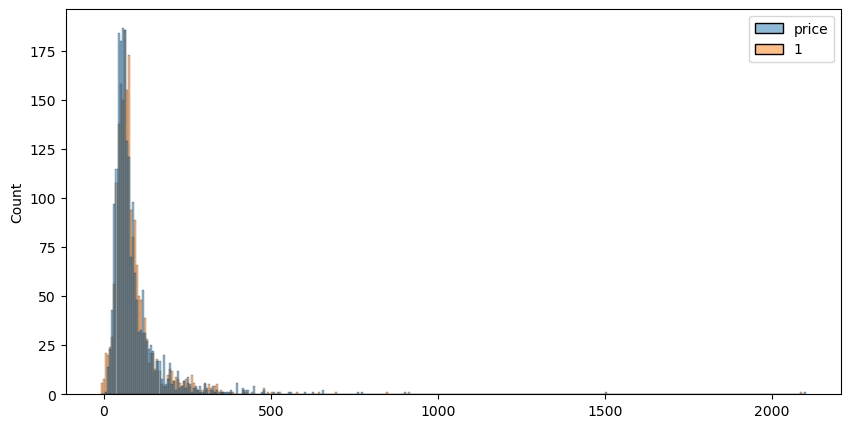

In [240]:
sns.histplot((y_test,y_pred))
plt.show()